### Tree Based Model

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px
import klib

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [72]:
df = pd.read_csv(r"C:\Users\Maftuna\Desktop\Training Data.csv")

In [73]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [75]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [76]:
df = df.drop('Id', axis=1)

In [77]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [78]:
# Cardinality 

cardinality_categorical = df.select_dtypes(include=['object']).nunique()
print(cardinality_categorical)

Married/Single       2
House_Ownership      3
Car_Ownership        2
Profession          51
CITY               317
STATE               29
dtype: int64


In [79]:
df['House_Ownership'].unique()

array(['rented', 'norent_noown', 'owned'], dtype=object)

In [80]:
df = klib.data_cleaning(df)

Shape of cleaned data: (43190, 12) - Remaining NAs: 0


Dropped rows: 208810
     of which 208810 duplicates. (Rows (first 150 shown): [5366, 5367, 5368, 5370, 5371, 5373, 5374, 5375, 5377, 5378, 5379, 5381, 5385, 5386, 5387, 5388, 5389, 5390, 5391, 5392, 5395, 5397, 5398, 5399, 5400, 5401, 5402, 5403, 5406, 5407, 5408, 5409, 5410, 5411, 5413, 5414, 5415, 5417, 5418, 5419, 5421, 5422, 5428, 5429, 5430, 5431, 5432, 5434, 5435, 5437, 5439, 5440, 5441, 5442, 5443, 5444, 5445, 5447, 5448, 5449, 5450, 5451, 5452, 5453, 5456, 5457, 5459, 5460, 5461, 5462, 5463, 5464, 5465, 5466, 5467, 5469, 5470, 5471, 5472, 5473, 5475, 5476, 5477, 5478, 5479, 5480, 5481, 5482, 5483, 5484, 5486, 5487, 5489, 5490, 5491, 5492, 5493, 5494, 5495, 5496, 5499, 5500, 5501, 5502, 5503, 5504, 5506, 5507, 5508, 5509, 5510, 5511, 5512, 5513, 5515, 5516, 5518, 5519, 5522, 5523, 5524, 5525, 5526, 5527, 5528, 5529, 5531, 5532, 5534, 5535, 5536, 5537, 5538, 5540, 5541, 5542, 5543, 5544, 5545, 5547, 5548, 5549, 5550, 5551, 

In [81]:
le = LabelEncoder()

df['married_single'] = le.fit_transform(df['married_single'])

In [82]:
df.columns

Index(['income', 'age', 'experience', 'married_single', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_yrs',
       'current_house_yrs', 'risk_flag'],
      dtype='object')

In [83]:
oe =OrdinalEncoder()

ordina_col = ['house_ownership', 'car_ownership', 'profession', 'city', 'state']
df[ordina_col] = oe.fit_transform(df[ordina_col])

In [84]:
df.head()

,income,age,experience,married_single,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag
0,1303834,23,3,1,2.0,0.0,33.0,251.0,13.0,3,13,0
1,7574516,40,10,1,2.0,0.0,43.0,227.0,14.0,9,13,0
2,3991815,66,4,0,2.0,0.0,47.0,8.0,12.0,4,10,0
3,6256451,41,2,1,2.0,1.0,43.0,54.0,17.0,2,12,1
4,5768871,47,11,1,2.0,0.0,11.0,296.0,22.0,3,14,1


In [85]:
X = df.drop('risk_flag', axis=1)
X

,income,age,experience,married_single,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs
0,1303834,23,3,1,2.0,0.0,33.0,251.0,13.0,3,13
1,7574516,40,10,1,2.0,0.0,43.0,227.0,14.0,9,13
2,3991815,66,4,0,2.0,0.0,47.0,8.0,12.0,4,10
3,6256451,41,2,1,2.0,1.0,43.0,54.0,17.0,2,12
4,5768871,47,11,1,2.0,0.0,11.0,296.0,22.0,3,14
...,...,...,...,...,...,...,...,...,...,...,...
43185,8154883,43,13,1,2.0,0.0,45.0,162.0,28.0,6,11
43186,2843572,26,10,1,2.0,0.0,3.0,251.0,13.0,6,11
43187,4522448,46,7,1,2.0,0.0,17.0,144.0,14.0,7,12
43188,6507128,45,0,1,2.0,0.0,27.0,233.0,18.0,0,10


In [86]:
y = df['risk_flag']
y

0        0
1        0
2        0
3        1
4        1
        ..
43185    0
43186    0
43187    0
43188    0
43189    0
Name: risk_flag, Length: 43190, dtype: int8

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

In [88]:
model_gradient = GradientBoostingClassifier( max_depth=5, criterion='friedman_mse')

In [89]:
model_gradient

GradientBoostingClassifier(max_depth=5)

In [90]:
model_gradient.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5)

In [91]:
y_pred = model_gradient.predict(X_test)

In [92]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[27559   204]
 [ 6733    56]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89     27763
           1       0.22      0.01      0.02      6789

    accuracy                           0.80     34552
   macro avg       0.51      0.50      0.45     34552
weighted avg       0.69      0.80      0.72     34552


Accuracy Score:
0.7992301458670988


In [93]:
fig = px.histogram(df, x = "risk_flag",
                   title= "Risk Flag Class Distribution",
                     text_auto=True)
fig.show()

In [94]:
results_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

fig = px.histogram(results_df,
                    barmode="group", 
                    title="Actual vs Predicted Values")
fig.show()

In [95]:
feature_importance = model_gradient.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

fig = px.bar(importance_df, x='Feature', y='Importance', title='Feature Importances')
fig.show()

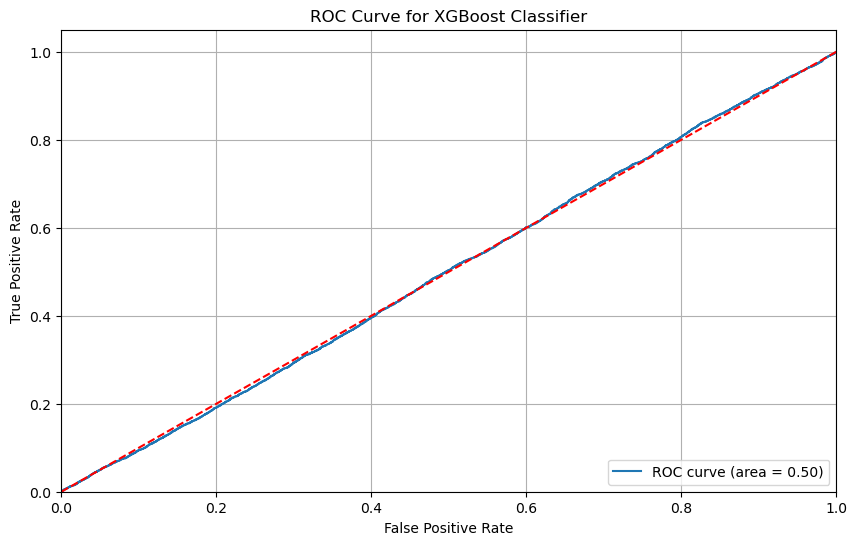

In [96]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Ehtimollarni olish
y_pred_proba = model_gradient.predict_proba(X_test)[:, 1]

# ROC uchun FPR, TPR
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Grafik
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal chiziq
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Classifier')
plt.legend(loc="lower right")
plt.grid()
plt.show()



### Grid Search 

In [97]:
grich_search = {
    'max_depth': [4, 7, 10],
    'min_samples_split' : [2, 5, 7],
    'min_samples_leaf' : [1, 3, 6],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [98]:
grich_search

{'max_depth': [4, 7, 10],
 'min_samples_split': [2, 5, 7],
 'min_samples_leaf': [1, 3, 6],
 'max_features': ['auto', 'sqrt', 'log2']}

In [99]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=model_gradient,
                             param_grid=grich_search,
                             cv =5, scoring='accuracy', n_jobs=1
                            )

# Fit the model 
grid_search.fit(X_train, y_train)

c:\Users\Maftuna\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning:


135 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Maftuna\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Maftuna\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\Maftuna\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Maftuna\anaconda3\Lib\

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(max_depth=5), n_jobs=1,
             param_grid={'max_depth': [4, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 6],
                         'min_samples_split': [2, 5, 7]},
             scoring='accuracy')

In [100]:
print("Best Prametrs:" , grid_search.best_params_)

Best Prametrs: {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5}


In [101]:
best_model = grid_search.best_estimator_

In [102]:
best_model

GradientBoostingClassifier(max_depth=4, max_features='log2',
                           min_samples_split=5)

In [103]:
y_predict = best_model.predict(X_test)

In [104]:
acc = accuracy_score(y_test, y_predict)
print("Accuracy:", acc)

Accuracy: 0.8027031720305626


### Random Search 

In [105]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


random_param = {
    'n_estimators': randint(50, 200),        # tasodifiy butun sonlar oralig‘i
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]  # Bu oddiy ro‘yxat bo‘lishi mumkin
}



In [106]:
random_search = RandomizedSearchCV(
    estimator=model_gradient,
    param_distributions=random_param,
    n_iter=20, 
    scoring='f1',
    cv=5, 
    verbose=1,
    random_state=42,
    n_jobs=1

)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [107]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(max_depth=5),
                   n_iter=20, n_jobs=1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000265A69B8A10>,
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000265ABD633E0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000265A6A79460>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000265A6AC9220>},
                   random_state=42, scoring='f1', verbose=1)

In [108]:
best_model_ran = random_search.best_estimator_

In [109]:
y_pred_ran = best_model_ran.predict(X_test)


In [110]:
print(classification_report(y_test, y_pred_ran))
print("Accuracy Score:", accuracy_score(y_test, y_pred_ran))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88     27763
           1       0.16      0.02      0.03      6789

    accuracy                           0.79     34552
   macro avg       0.48      0.50      0.46     34552
weighted avg       0.68      0.79      0.71     34552

Accuracy Score: 0.7904028710349618
